# Compare 2F, 2C, CHAOS MMA model values for one day - 01/01/2016


In [1]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC", "F"],
                     models=["MCO_SHA_2C", "MCO_SHA_2F",
                             "MMA_SHA_2C-Primary", "MMA_SHA_2C-Secondary",
                             "MMA_SHA_2F-Primary", "MMA_SHA_2F-Secondary",
                             "CHAOS-6-Core", "CHAOS-6-MMA-Primary", "CHAOS-6-MMA-Secondary",],
                     sampling_step="PT1S")

ds_20160101 = request.get_between(start_time=dt.datetime(2016,1,1),
                                  end_time=dt.datetime(2016,1,2)).as_xarray()
ds = ds_20160101.copy()
ds

[1/1] Processing:  100%|██████████|  [ Elapsed: 01:07, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (30.514MB)


<xarray.Dataset>
Dimensions:                      (Timestamp: 86400, dim: 3)
Coordinates:
  * Timestamp                    (Timestamp) datetime64[ns] 2016-01-01 ... 2016-01-01T23:59:59
Dimensions without coordinates: dim
Data variables:
    Spacecraft                   (Timestamp) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    Latitude                     (Timestamp) float64 -72.5 -72.56 ... 31.67
    Longitude                    (Timestamp) float64 92.79 92.82 ... -95.37
    Radius                       (Timestamp) float64 6.834e+06 ... 6.823e+06
    B_NEC                        (Timestamp, dim) float64 -1.581e+03 ... 3.397e+04
    B_NEC_MCO_SHA_2C             (Timestamp, dim) float64 -1.578e+03 ... 3.395e+04
    B_NEC_MCO_SHA_2F             (Timestamp, dim) float64 -1.576e+03 ... 3.395e+04
    B_NEC_MMA_SHA_2C-Primary     (Timestamp, dim) float64 -33.98 11.46 ... 28.65
    B_NEC_MMA_SHA_2C-Secondary   (Timestamp, dim) float64 -8.077 ... -4.221
    B_NEC_MMA_SHA_2F-Primary     (Timestamp, di


From top panel down: X, Y, Z components

2F in black, 2C in blue, CHAOS in red

Solid lines: primary (external) component, dashed lines: secondary (internal)

/home/ash/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/ash/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ash/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


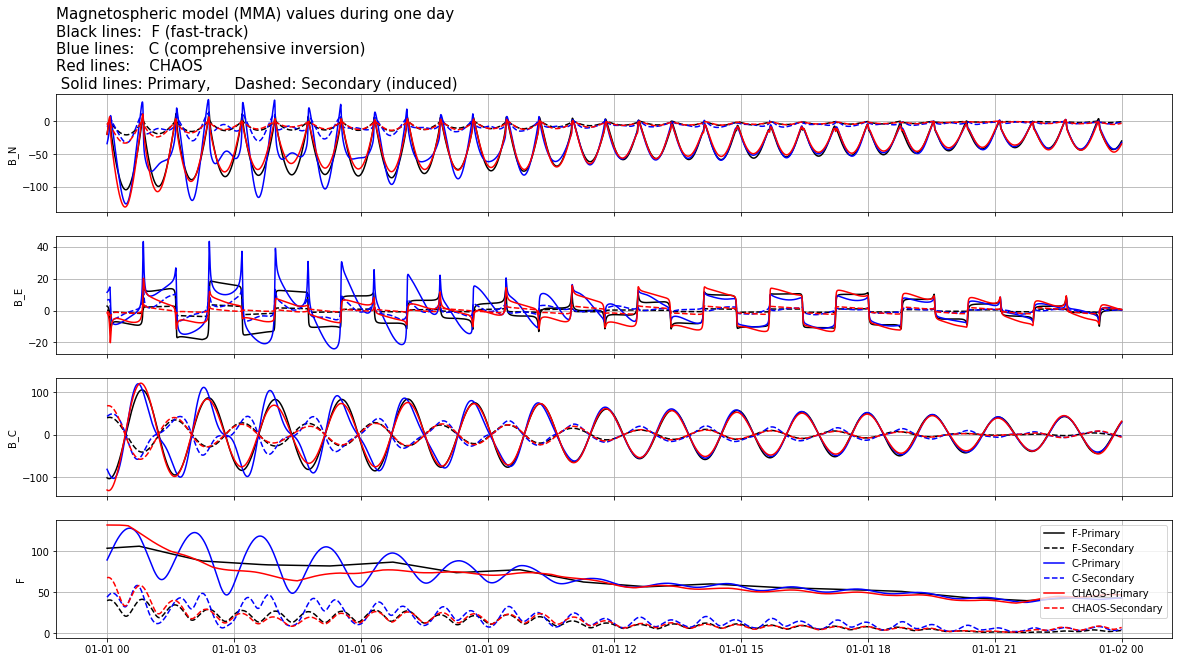

In [2]:
fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2F-Primary"][:,i], c='k')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2F-Secondary"][:,i], c='k', linestyle="--")
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2C-Primary"][:,i], c='b')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_MMA_SHA_2C-Secondary"][:,i], c='b', linestyle="--")
    axes[i].plot(ds["Timestamp"], ds["B_NEC_CHAOS-6-MMA-Primary"][:,i], c='r')
    axes[i].plot(ds["Timestamp"], ds["B_NEC_CHAOS-6-MMA-Secondary"][:,i], c='r', linestyle="--")
    axes[i].set_ylabel(ylabel)
    axes[i].grid()

axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2F-Primary"], c='k', label="F-Primary")
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2F-Secondary"], c='k', linestyle="--", label="F-Secondary")
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2C-Primary"], c='b', label="C-Primary")
axes[3].plot(ds["Timestamp"], ds["F_MMA_SHA_2C-Secondary"], c='b', linestyle="--", label="C-Secondary")
axes[3].plot(ds["Timestamp"], ds["F_CHAOS-6-MMA-Primary"], c='r', label="CHAOS-Primary")
axes[3].plot(ds["Timestamp"], ds["F_CHAOS-6-MMA-Secondary"], c='r', linestyle="--", label="CHAOS-Secondary")
axes[3].set_ylabel("F")
axes[3].grid()
axes[3].legend();

axes[0].set_title("Magnetospheric model (MMA) values during one day\n"
             "Black lines:  F (fast-track)\n"
             "Blue lines:   C (comprehensive inversion)\n"
             "Red lines:    CHAOS\n"
             " Solid lines: Primary,     Dashed: Secondary (induced)", size=15, loc="left");

# Compare 2F, 2C, CHAOS data-(core+mma) residual values

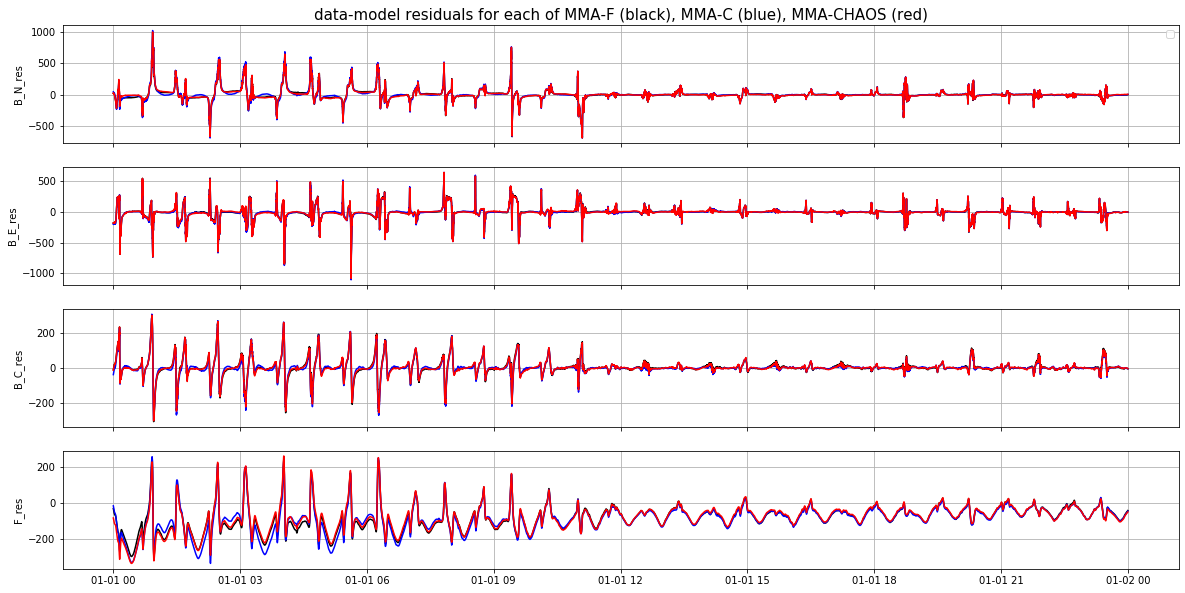

In [3]:
ds["B_res_2F"] = ds["B_NEC"] - ds["B_NEC_MCO_SHA_2F"] \
                             - ds["B_NEC_MMA_SHA_2F-Primary"] \
                             - ds["B_NEC_MMA_SHA_2F-Secondary"]

ds["F_res_2F"] = ds["F"] - ds["F_MCO_SHA_2F"] \
                             - ds["F_MMA_SHA_2F-Primary"] \
                             - ds["F_MMA_SHA_2F-Secondary"]

ds["B_res_2C"] = ds["B_NEC"] - ds["B_NEC_MCO_SHA_2C"] \
                             - ds["B_NEC_MMA_SHA_2C-Primary"] \
                             - ds["B_NEC_MMA_SHA_2C-Secondary"]

ds["F_res_2C"] = ds["F"] - ds["F_MCO_SHA_2C"] \
                             - ds["F_MMA_SHA_2C-Primary"] \
                             - ds["F_MMA_SHA_2C-Secondary"]

ds["B_res_CHAOS"] = ds["B_NEC"] - ds["B_NEC_CHAOS-6-Core"] \
                             - ds["B_NEC_CHAOS-6-MMA-Primary"] \
                             - ds["B_NEC_CHAOS-6-MMA-Secondary"]

ds["F_res_CHAOS"] = ds["F"] - ds["F_CHAOS-6-Core"] \
                             - ds["F_CHAOS-6-MMA-Primary"] \
                             - ds["F_CHAOS-6-MMA-Secondary"]

fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N_res', 'B_E_res', 'B_C_res']):
    axes[i].plot(ds["Timestamp"], ds["B_res_2F"][:,i], c='k')
    axes[i].plot(ds["Timestamp"], ds["B_res_2C"][:,i], c='b')
    axes[i].plot(ds["Timestamp"], ds["B_res_CHAOS"][:,i], c='r')
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();

axes[3].plot(ds["Timestamp"], ds["F_res_2F"], c='k')
axes[3].plot(ds["Timestamp"], ds["F_res_2C"], c='b')
axes[3].plot(ds["Timestamp"], ds["F_res_CHAOS"], c='r')
axes[3].set_ylabel("F_res")
axes[3].grid()

axes[0].set_title("data-model residuals for each of MMA-F (black), MMA-C (blue), MMA-CHAOS (red)", size=15);

---

# Several years Swarm-A time series of CHAOS_MMA at 1-minute sampling

In [4]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC", "F"],
                     models=[
                         '"CHAOS-6-Combined" = "CHAOS-6-Core" + "CHAOS-6-Static"',
                         '"CHAOS-6-MMA" = "CHAOS-6-MMA-Primary" + "CHAOS-6-MMA-Secondary"'
                     ],
                     sampling_step="PT1M")

ds = request.get_between(start_time=dt.datetime(2013,1,1),
                         end_time=dt.datetime(2019,1,1)).as_xarray()

[1/1] Processing:  100%|██████████|  [ Elapsed: 27:55, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:26, Remaining: 00:00 ] (346.001MB)


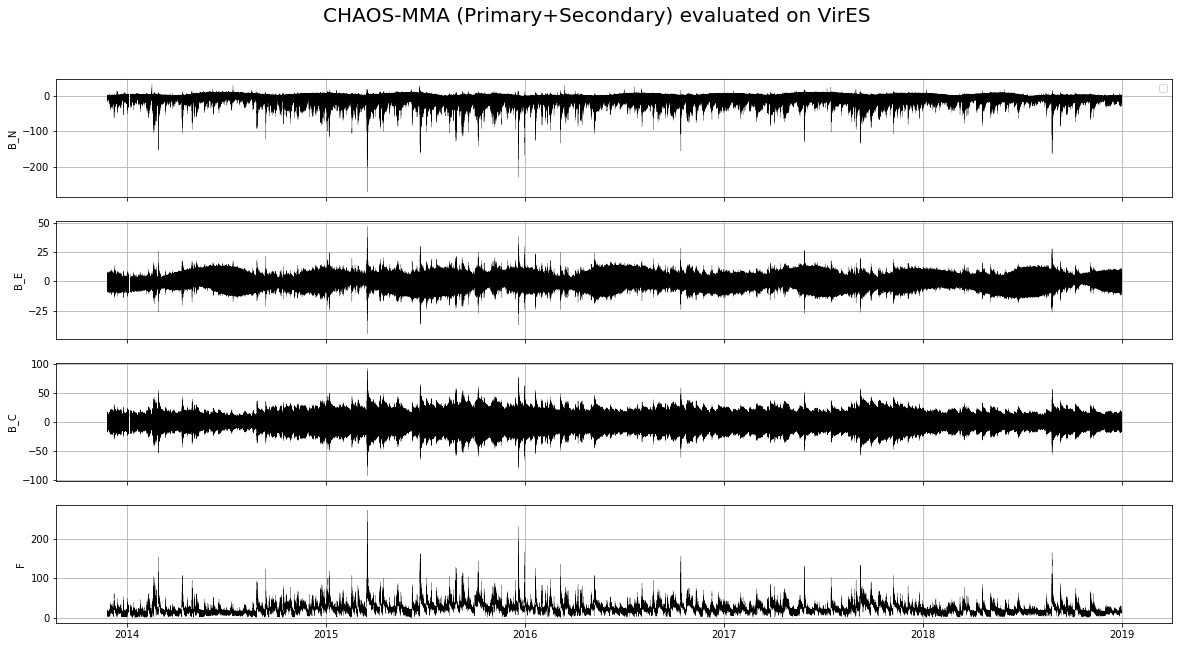

In [5]:
fig, axes = plt.subplots(figsize=(20,10), nrows=4, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds["Timestamp"], ds["B_NEC_CHAOS-6-MMA"][:,i], c='k', linewidth=0.2)
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();
axes[3].plot(ds["Timestamp"], ds["F_CHAOS-6-MMA"], c='k', linewidth=0.2)
axes[3].set_ylabel("F")
axes[3].grid()
fig.suptitle("CHAOS-MMA (Primary+Secondary) evaluated on VirES", fontsize=20);

## full CHAOS residuals (data - CHAOS-core-static-mma)

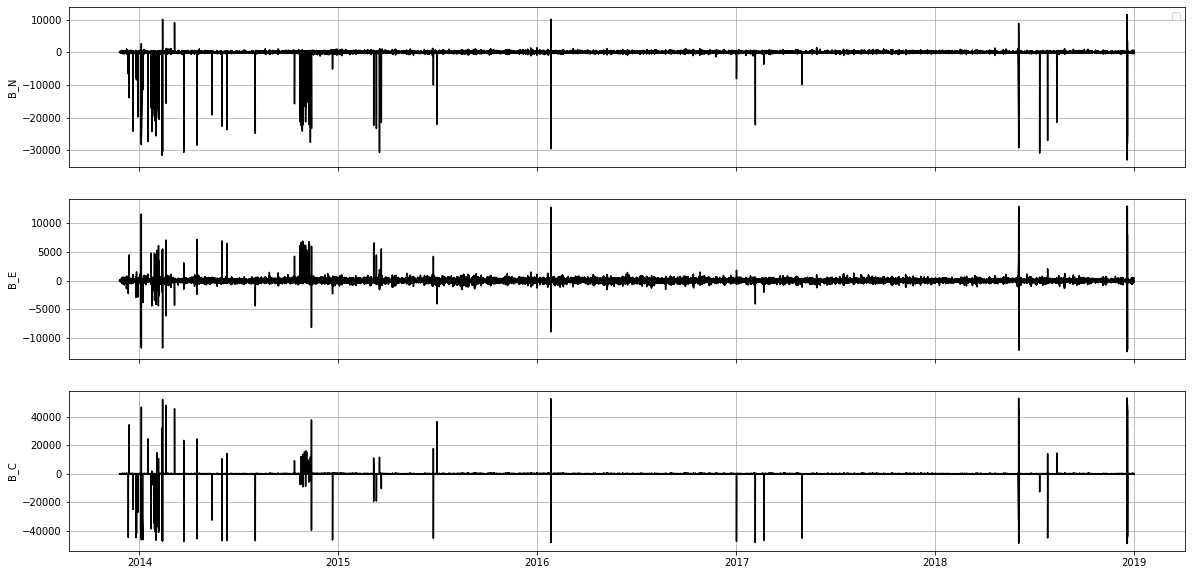

In [7]:
ds["B_NEC_res_CHAOS-Full"] = ds["B_NEC"] - ds["B_NEC_CHAOS-6-Combined"] \
                                         - ds["B_NEC_CHAOS-6-MMA"]

fig, axes = plt.subplots(figsize=(20,10), nrows=3, ncols=1, sharex=True)
for i, ylabel in enumerate(['B_N', 'B_E', 'B_C']):
    axes[i].plot(ds["Timestamp"], ds["B_NEC_res_CHAOS-Full"][:,i], c='k')
    axes[i].set_ylabel(ylabel)
    axes[i].grid()
axes[0].legend();

Need to filter out these spikes, presumably caused by bad data - check Flags_F and Flags_B